### Student Information
Name:阮盈泓

Student ID:112358024

GitHub ID:harryjuan75

Kaggle name:HJ_Oblivion

Kaggle private scoreboard snapshot: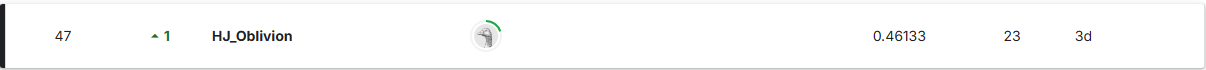

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home exercises** in the [DM2024-Lab2-master Repo](https://github.com/didiersalazar/DM2024-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework) regarding Emotion Recognition on Twitter by this link: https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (0.6N + 1 - x) / (0.6N) * 10 + 20 points, where N is the total number of participants, and x is your rank. (ie. If there are 100 participants and you rank 3rd your score will be (0.6 * 100 + 1 - 3) / (0.6 * 100) * 10 + 20 = 29.67% out of 30%.)   
    Submit your last submission **BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)**. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developing the model for the competition (You can use code and comment on it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)__. 

* Note: I did this all on kaggle, so i just download and supplement some work i've tried right here.<br>
* In my presentation, i'll show the version with the highest prediciton,then i'll move on to the works that i tried but didn't get good result. 
* preprocess the data to a structured one


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dm-2024-isa-5810-lab-2-homework/tweets_DM.json
/kaggle/input/dm-2024-isa-5810-lab-2-homework/sampleSubmission.csv
/kaggle/input/dm-2024-isa-5810-lab-2-homework/data_identification.csv
/kaggle/input/dm-2024-isa-5810-lab-2-homework/emotion.csv
/kaggle/input/emotag/EmoTag1200-scores.csv


In [2]:
# Load and display the CSV files
sampleSubmission = pd.read_csv(os.path.join('/kaggle/input/dm-2024-isa-5810-lab-2-homework/', 'sampleSubmission.csv'))
data_identification =  pd.read_csv(os.path.join('/kaggle/input/dm-2024-isa-5810-lab-2-homework/', 'data_identification.csv'))
emotion =  pd.read_csv(os.path.join('/kaggle/input/dm-2024-isa-5810-lab-2-homework/', 'emotion.csv'))



print(data_identification.head())
print(emotion.head())
print(sampleSubmission.head())

   tweet_id identification
0  0x28cc61           test
1  0x29e452          train
2  0x2b3819          train
3  0x2db41f           test
4  0x2a2acc          train
   tweet_id       emotion
0  0x3140b1       sadness
1  0x368b73       disgust
2  0x296183  anticipation
3  0x2bd6e1           joy
4  0x2ee1dd  anticipation
         id   emotion
0  0x2c7743  surprise
1  0x2c1eed  surprise
2  0x2826ea  surprise
3  0x356d9a  surprise
4  0x20fd95  surprise


In [3]:
import pandas as pd
import json

# Define the file path
file_path = '/kaggle/input/dm-2024-isa-5810-lab-2-homework/tweets_DM.json'

# Read the NDJSON file line by line
tweets = []
with open(file_path, 'r') as file:
    for line in file:
        # Parse each line as JSON
        tweet_data = json.loads(line.strip())
        # Extract relevant fields from the nested structure
        tweet = tweet_data['_source']['tweet']
        tweets.append({
            'tweet_id': tweet['tweet_id'],
            'text': tweet['text'],
            'hashtags': tweet['hashtags']
        })

# Convert to a DataFrame
tweets_df = pd.DataFrame(tweets)

# Display the first few rows
print(tweets_df.head())



   tweet_id                                               text  \
0  0x376b20  People who post "add me on #Snapchat" must be ...   
1  0x2d5350  @brianklaas As we see, Trump is dangerous to #...   
2  0x28b412  Confident of your obedience, I write to you, k...   
3  0x1cd5b0                Now ISSA is stalking Tasha 😂😂😂 <LH>   
4  0x2de201  "Trust is not the same as faith. A friend is s...   

                        hashtags  
0                     [Snapchat]  
1  [freepress, TrumpLegacy, CNN]  
2                   [bibleverse]  
3                             []  
4                             []  


In [4]:
# Merge the emotion labels with the dataset
data = data_identification.merge(emotion, on='tweet_id', how='left')
data.head(10)

,tweet_id,identification,emotion
0,0x28cc61,test,NaN
1,0x29e452,train,joy
2,0x2b3819,train,joy
3,0x2db41f,test,NaN
4,0x2a2acc,train,trust
5,0x2a8830,train,joy
6,0x20b21d,train,anticipation
7,0x2452cf,train,anticipation
8,0x2d729d,train,anticipation
9,0x2ab56d,train,joy


In [5]:
# Separate train and test data
train_data = data[data['identification'] == 'train']
test_data = data[data['identification'] == 'test']

train_data = train_data.merge(tweets_df, on='tweet_id')
test_data = test_data.merge(tweets_df, on='tweet_id')


### REAL WORK from here

* the main concept of my idea is to transoform those emoji appeared in the context to words, ex.😊 will be transform to 'joy'.
* so i take this reference：https://github.com/abushoeb/EmoTag , and try to transform emojis to scores, and covnert the socre to the most related emotion(WORD) so that the NLP model can betetr address it.
* but the outcome didn't improve well (with this data support) and then i try to directly transoform emoji to emotions(word description) in the context.
    

In [6]:
import pandas as pd

#Import emoji-related data pair with corresponding emotion(word)
emotag_data = pd.read_csv('/kaggle/input/emotag/EmoTag1200-scores.csv') 


print(emotag_data.head())



  unicode emoji           name  anger  anticipation  disgust  fear   joy  \
0   1F308     🌈        rainbow   0.00          0.28     0.00  0.00  0.69   
1   1F319     🌙  crescent moon   0.00          0.31     0.00  0.00  0.25   
2   1F31A     🌚  new moon face   0.06          0.08     0.17  0.06  0.42   
3   1F31E     🌞  sun with face   0.00          0.22     0.00  0.00  0.78   
4   1F31F     🌟   glowing star   0.00          0.28     0.00  0.00  0.53   

   sadness  surprise  trust  
0     0.06      0.22   0.33  
1     0.00      0.06   0.25  
2     0.19      0.06   0.11  
3     0.00      0.11   0.22  
4     0.00      0.25   0.31  


* from the above, we expect that emotion columns with scores will be appended to the test data, and this part is only to address the emoji.
* Below i started to clean tweeter context, including dealing with stopwords, and meaningless characters like <LH>, which often show up in the context but i don't think it's gonna do help to my work.There're also other works illustrated in the code.

In [7]:

import os
import nltk
import zipfile

# Set up NLTK data path
nltk_data_path = '/kaggle/working/nltk_data'
nltk.data.path.append(nltk_data_path)

# Build necessary content 
os.makedirs(os.path.join(nltk_data_path, 'corpora'), exist_ok=True)

# Download NLTK resources
nltk.download('stopwords', download_dir=nltk_data_path)
nltk.download('wordnet', download_dir=nltk_data_path)
nltk.download('omw-1.4', download_dir=nltk_data_path)

# Upzip resources
for resource in ['wordnet', 'omw-1.4']:
    zip_path = os.path.join(nltk_data_path, 'corpora', f"{resource}.zip")
    if os.path.exists(zip_path):
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(os.path.join(nltk_data_path, 'corpora'))
            print(f"{resource} 解壓縮完成")

# Test part
from nltk.corpus import wordnet
print(wordnet.synsets("run")) 



[nltk_data] Downloading package stopwords to
[nltk_data]     /kaggle/working/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /kaggle/working/nltk_data...
wordnet 解壓縮完成
omw-1.4 解壓縮完成
[Synset('run.n.01'), Synset('test.n.05'), Synset('footrace.n.01'), Synset('streak.n.01'), Synset('run.n.05'), Synset('run.n.06'), Synset('run.n.07'), Synset('run.n.08'), Synset('run.n.09'), Synset('run.n.10'), Synset('rivulet.n.01'), Synset('political_campaign.n.01'), Synset('run.n.13'), Synset('discharge.n.06'), Synset('run.n.15'), Synset('run.n.16'), Synset('run.v.01'), Synset('scat.v.01'), Synset('run.v.03'), Synset('operate.v.01'), Synset('run.v.05'), Synset('run.v.06'), Synset('function.v.01'), Synset('range.v.01'), Synset('campaign.v.01'), Synset('play.v.18'), Synset('run.v.11'), Synset('tend.v.01'), Synset('run.v.13'), Synset('run.v.14'), Synse

In [8]:
import os

wordnet_path = '/kaggle/working/nltk_data/corpora'
if os.path.exists(wordnet_path):
    print("WordNet resource exists:", os.listdir(wordnet_path))
else:
    print("WordNet resource is missing.")

WordNet resource exists: ['wordnet.zip', 'stopwords', 'stopwords.zip', 'omw-1.4', 'wordnet', 'omw-1.4.zip']


In [9]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 6.6 MB/s eta 0:00:00


In [19]:
import nltk
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import contractions

# Initialize tools
nltk.download('stopwords')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Do mapping here
emoji_sentiment_mapping = emotag_data.set_index('emoji')[['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']].to_dict(orient='index')

# clean text content
def clean_text(text):
    text = contractions.fix(text)  # Expand contractions
    text = re.sub(r'@\w+', '<user>', text)  # Replace mentions
    text = re.sub(r'http\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'#(\w+)', lambda m: ' '.join(re.findall(r'[A-Z]?[a-z]+|[A-Z]+(?![a-z])', m.group(1))), text)  # Split hashtags
    text = re.sub(r'<LH>', '', text)  # Remove <LH>
    text = re.sub(r'\b(19|20)\d{2}\b', '<YEAR>', text)  # Replace years with <YEAR>
    text = re.sub(r'\d+', '<NUM>', text)  # Replace other numbers with <NUM>
    text = ''.join([emoji_sentiment_mapping.get(char, {'joy': '', 'trust': ''}) and char for char in text])  # Replace emojis
    text = re.sub(r'[^\w\s]', ' ', text)  # Remove non-alphanumeric characters while keeping spaces
    text = re.sub(r'\s+', ' ', text).strip()  # Handle extra spaces
    text = text.lower()  # Convert to lowercase
    words = [lemmatizer.lemmatize(word, pos='v') for word in text.split() if word not in stop_words]  # Remove stop words & lemmatize
    return ' '.join(words)

# Calculate emoji sentiment scores and replace emojis with labels
def calculate_and_replace_emojis(text):
    emotion_totals = {emotion: 0 for emotion in emoji_sentiment_mapping[list(emoji_sentiment_mapping.keys())[0]].keys()}
    clean_text = []
    for char in text:
        if char in emoji_sentiment_mapping:
            # Accumulate emotion scores
            for emotion, value in emoji_sentiment_mapping[char].items():
                emotion_totals[emotion] += value
            # Replace emoji with emotion label
            clean_text.append(f"<{list(emoji_sentiment_mapping[char].keys())[0].upper()}>")
        else:
            clean_text.append(char)
    return ''.join(clean_text), emotion_totals

# Data preprocessing function, applying cleaning to the dataset
def preprocess_dataset(dataset, text_column):
    clean_texts = []
    emotion_scores_list = []

    for text in dataset[text_column]:
        cleaned_text, emotion_scores = calculate_and_replace_emojis(text)
        clean_texts.append(cleaned_text)
        emotion_scores_list.append(emotion_scores)

    dataset['clean_text'] = clean_texts  # Cleaned text (includes emotion labels)
    for emotion in emotion_scores_list[0].keys():
        dataset[emotion] = [scores[emotion] for scores in emotion_scores_list]  # Save each emotion score as a column

    return dataset

# To see result
train_data = preprocess_dataset(train_data, 'text')
test_data = preprocess_dataset(test_data, 'text')

print(train_data[['text', 'clean_text']].head())

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
                                                                                                                                           text  \
0  Huge Respect🖒 @JohnnyVegasReal talking about losing his dad to cancer."if you dont remember the good times it was all for nothing"#beautiful   
1                                                       Yoooo we hit all our monthly goals with the new app in two weeks. #spateradio #app <LH>   
2                                                             @KIDSNTS @PICU_BCH @uhbcomms @BWCHBoss Well done team 🌟 <LH> of every one of you.   
3          Come join @ambushman27 on #PUBG while he strives for chicken donners! #GamersUnite #twitch #BeHealthy #StayPositive #vegan <LH> <LH>   
4   @fanshixieen2014 

In [20]:
# Adjust pandas display options
pd.set_option('display.max_colwidth', None)  # Show the full content of each column
pd.set_option('display.max_rows', 100)      # Adjust to show more rows if needed
pd.set_option('display.max_columns', None)  # Ensure all columns are displayed

# Display the specified columns/ so that i can inspect whcih part of characters i should address more
print(train_data[['text', 'clean_text']].head(20))  # Correct syntax for selecting multiple columns


                                                                                                                                            text  \
0   Huge Respect🖒 @JohnnyVegasReal talking about losing his dad to cancer."if you dont remember the good times it was all for nothing"#beautiful   
1                                                        Yoooo we hit all our monthly goals with the new app in two weeks. #spateradio #app <LH>   
2                                                              @KIDSNTS @PICU_BCH @uhbcomms @BWCHBoss Well done team 🌟 <LH> of every one of you.   
3           Come join @ambushman27 on #PUBG while he strives for chicken donners! #GamersUnite #twitch #BeHealthy #StayPositive #vegan <LH> <LH>   
4    @fanshixieen2014 Blessings!My #strength little. My #bones brittle.Door is open.#Praise #God. I won't go on nod. Philadelphia Church Rev.3:8   
5                                                      Never give up. The manifestation of your goal comes throu

* Here is the DNN model construction, I firstly convert words in the text (clean_text) into numerical tokens and then Converts tokenized text into <br>sequences of fixed length.Secondly, convert text labels (emotion categories) into numerical values.(e.g., "sad" → 0, "anger" → 1...).<br>

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import LabelEncoder
import numpy as np
import tensorflow as tf

# Using GPU
if not tf.config.list_physical_devices('GPU'):
    raise SystemError('GPU device not found. Please ensure that GPU is available and TensorFlow is configured to use it.')


# Use `clean_text` to replace the original text for model training
# Set parameters
vocab_size = 35000  # Reduce vocabulary size
max_len = 128       # Reduce sequence length to lower memory usage
embedding_dim = 64  # Increase embedding dimension to enhance representation ability
lstm_units = 64     # Increase the number of LSTM units to improve learning capacity

# Text vectorization (based on `clean_text`)
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train_data['clean_text'])
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data['clean_text']), maxlen=max_len)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data['clean_text']), maxlen=max_len)

# Label encoding
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['emotion'])

# Build the LSTM model
model = Sequential()
# Converts numerical word indices into dense vectors of fixed size
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
# 1st layer ias to processes the input text in both forward and backward directions, improving context understanding
model.add(Bidirectional(LSTM(lstm_units, return_sequences=True)))  # Use Bidirectional LSTM to enhance feature learning

model.add(BatchNormalization())
model.add(Dropout(0.3))
# 2nd layer is to processes the output of the first LSTM layer to learn additional temporal features.
model.add(LSTM(lstm_units))  # Add a second LSTM layer to increase model complexity
model.add(BatchNormalization())# Normalizes layer outputs to accelerate the process
model.add(Dropout(0.3))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))# Outputs probabilities for each emotion category using the softmax activation function.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])# Adam(optimizer is used for efficient gradient updates),using accuracy as metricss(which i dont think objeacitve enough, i should have done more

# Train the model with callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)#  Stops training if validation loss doesn’t improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-5)  # Dynamically reduce learning rate
# Note:Prediction: 
# The model generates probabilities for each emotion category for each test sample.
# Then the category with the highest probability is selected as the prediction.
with tf.device('/GPU:0'):
    model.fit(
        X_train, y_train, 
        epochs=4,  # Increase epochs to allow more learning opportunities for the model
        batch_size=64,  # Increase batch_size to fully utilize GPU capabilities
        validation_split=0.2, 
        callbacks=[early_stopping, reduce_lr]
    )

# Predict emotions
with tf.device('/GPU:0'):
    y_pred_probs = model.predict(X_test)
    y_pred_encoded = np.argmax(y_pred_probs, axis=1)
    y_pred = label_encoder.inverse_transform(y_pred_encoded)

# See results
test_data['predicted_emotion'] = y_pred
print(test_data[['clean_text', 'predicted_emotion']].head())


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/4
18195/18195 ━━━━━━━━━━━━━━━━━━━━ 494s 27ms/step - accuracy: 0.5169 - loss: 1.3561 - val_accuracy: 0.5896 - val_loss: 1.1362 - learning_rate: 0.0010
Epoch 2/4
18195/18195 ━━━━━━━━━━━━━━━━━━━━ 496s 27ms/step - accuracy: 0.6056 - loss: 1.1029 - val_accuracy: 0.6048 - val_loss: 1.0977 - learning_rate: 0.0010
Epoch 3/4
18195/18195 ━━━━━━━━━━━━━━━━━━━━ 498s 27ms/step - accuracy: 0.6337 - loss: 1.0258 - val_accuracy: 0.6086 - val_loss: 1.0965 - learning_rate: 0.0010
Epoch 4/4
18195/18195 ━━━━━━━━━━━━━━━━━━━━ 497s 27ms/step - accuracy: 0.6550 - loss: 0.9671 - val_accuracy: 0.6047 - val_loss: 1.1029 - learning_rate: 0.0010
12875/12875 ━━━━━━━━━━━━━━━━━━━━ 96s 7ms/step
                                                                                                                                        clean_text  \
0                                                                @Habbo I've seen two separate colours of the elegant furni on your homepage? <LH>   
1                     

In [22]:
# Save predictions to a CSV file 
test_data['predicted_emotion'] = y_pred
output_data = test_data[['tweet_id', 'predicted_emotion']].rename(columns={'tweet_id': 'id', 'predicted_emotion': 'emotion'})#trim the column to our submission format
output_filename = '/kaggle/working/predicted_emotions_svm.csv'  # Save to Kaggle's working directory
output_data.to_csv(output_filename, index=False)
print(f"Predictions saved to Kaggle working directory: '{output_filename}' with columns renamed to 'id' and 'emotion'.")

Predictions saved to Kaggle working directory: '/kaggle/working/predicted_emotions_svm.csv' with columns renamed to 'id' and 'emotion'.


In [ ]:
output_data.head(20) #just for double check the format.

* the following are parts that i've tried relly hard (whether the embedding model, or trianing model), it just won't go.
* I know it seems more reasonalbe to use BERT type model to embedding and traing the data but in my case, but i was restricted to the hardware i've got, so the process takes me too long and i found out that methods took you so long doesn't really mean the outcome is going to be better, that's a hard lesoon i've learn the most in this Lab, but let's move on.
* try to rerun the code here so i've made some prepare ahead(can just ignore it)

In [3]:
### Begin Assignment Here
import numpy as np 
import pandas as pd 
import os
# Load and display the CSV files
sampleSubmission = pd.read_csv(os.path.join(r"C:\Users\HARRY JUAN\Desktop\DMLab2\dm-2024-isa-5810-lab-2-homework\sampleSubmission.csv"))
data_identification =  pd.read_csv(os.path.join(r"C:\Users\HARRY JUAN\Desktop\DMLab2\dm-2024-isa-5810-lab-2-homework\data_identification.csv"))
emotion =  pd.read_csv(os.path.join(r"C:\Users\HARRY JUAN\Desktop\DMLab2\dm-2024-isa-5810-lab-2-homework\emotion.csv"))



print(data_identification.head())
print(emotion.head())
print(sampleSubmission.head())

   tweet_id identification
0  0x28cc61           test
1  0x29e452          train
2  0x2b3819          train
3  0x2db41f           test
4  0x2a2acc          train
   tweet_id       emotion
0  0x3140b1       sadness
1  0x368b73       disgust
2  0x296183  anticipation
3  0x2bd6e1           joy
4  0x2ee1dd  anticipation
         id   emotion
0  0x2c7743  surprise
1  0x2c1eed  surprise
2  0x2826ea  surprise
3  0x356d9a  surprise
4  0x20fd95  surprise


In [5]:
import json

# Define the file path
file_path = r"C:\Users\HARRY JUAN\Desktop\DMLab2\dm-2024-isa-5810-lab-2-homework\tweets_DM.json"

# Read the NDJSON file line by line
tweets = []
with open(file_path, 'r') as file:
    for line in file:
        # Parse each line as JSON
        tweet_data = json.loads(line.strip())
        # Extract relevant fields from the nested structure
        tweet = tweet_data['_source']['tweet']
        tweets.append({
            'tweet_id': tweet['tweet_id'],
            'text': tweet['text'],
            'hashtags': tweet['hashtags']
        })

# Convert to a DataFrame
tweets_df = pd.DataFrame(tweets)

# Display the first few rows
print(tweets_df.head())


   tweet_id                                               text  \
0  0x376b20  People who post "add me on #Snapchat" must be ...   
1  0x2d5350  @brianklaas As we see, Trump is dangerous to #...   
2  0x28b412  Confident of your obedience, I write to you, k...   
3  0x1cd5b0                Now ISSA is stalking Tasha 😂😂😂 <LH>   
4  0x2de201  "Trust is not the same as faith. A friend is s...   

                        hashtags  
0                     [Snapchat]  
1  [freepress, TrumpLegacy, CNN]  
2                   [bibleverse]  
3                             []  
4                             []  


In [7]:
# Merge the emotion labels with the dataset
data = data_identification.merge(emotion, on='tweet_id', how='left')
data.head(10)

,tweet_id,identification,emotion
0,0x28cc61,test,NaN
1,0x29e452,train,joy
2,0x2b3819,train,joy
3,0x2db41f,test,NaN
4,0x2a2acc,train,trust
5,0x2a8830,train,joy
6,0x20b21d,train,anticipation
7,0x2452cf,train,anticipation
8,0x2d729d,train,anticipation
9,0x2ab56d,train,joy


In [8]:
# Separate train and test data
train_data = data[data['identification'] == 'train']
test_data = data[data['identification'] == 'test']

train_data = train_data.merge(tweets_df, on='tweet_id')
test_data = test_data.merge(tweets_df, on='tweet_id')

# Tried methods below

* I've noticed that the sample is biased so i've tried the following sampling method , try to improve the biased problem so that we can get a more balanced data
* it didn't imporove the result

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import pandas as pd

# Divide the data into different categories
groups = [group for _, group in train_data.groupby('emotion')]

# Upsample minority classes to match the size of the largest class
max_size = max(group.shape[0] for group in groups)
upsampled_groups = [resample(group, replace=True, n_samples=max_size, random_state=42) for group in groups]

# Combine all the upsampled data
train_data_balanced = pd.concat(upsampled_groups)

# Split the upsampled dataset (only one split operation)
X_train, X_test, y_train, y_test = train_test_split(
    train_data_balanced['text'], 
    train_data_balanced['emotion'], 
    test_size=0.2, 
    random_state=42, 
    stratify=train_data_balanced['emotion']  # Ensure class proportions remain consistent
)

# Convert the data into list format
X_train = X_train.tolist()
X_test = X_test.tolist()
y_train = y_train.tolist()
y_test = y_test.tolist()

# List the class names
class_names = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

# Output the dataset size and class distribution
print('Size of training set: %s' % len(X_train))
print('Size of test set: %s' % len(X_test))
print(train_data_balanced['emotion'].value_counts())

# Display the first 10 rows of the training data
print(train_data_balanced.head(10))

Size of training set: 3302508
Size of test set: 825628
emotion
anger           516017
anticipation    516017
disgust         516017
fear            516017
joy             516017
sadness         516017
surprise        516017
trust           516017
Name: count, dtype: int64
         tweet_id identification emotion  \
574191   0x2881e5          train   anger   
31103    0x289ced          train   anger   
1393611  0x24dde9          train   anger   
408983   0x253d4f          train   anger   
228873   0x2a6e81          train   anger   
612414   0x30a824          train   anger   
1357740  0x2e87ca          train   anger   
797313   0x372af9          train   anger   
582336   0x31b7ad          train   anger   
60935    0x227b65          train   anger   

                                                      text  \
574191   Tell me why this girls 8 day postpartum body l...   
31103    @gemboc1 Mine always gets in the way when I’m ...   
1393611  Disappointed by the service from @JustEatUK & .

* the following part were runed on google(i don't have dGPU) so the outcome are showed by image(forgive me...)
* i have tried to list the emoji and mannually match to the emotion(so we can replace the emoji directly with words description

In [ ]:
import nltk
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import contractions

# Initialize tools
nltk.download('stopwords')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Emoji and emotion list
emoji_sentiment_mapping = {
    "anger": [
        "😡", "💢", "👿", "🔥", "😠", "🤬", "🙄", "😤", "😾", "💣",
        "👊", "🖕", "👎", "🚫", "🛑", "⚡", "📛", "✋", "❌", "💔",
        "🙅‍♀️", "🙅‍♂️", "🚷", "🙍", "🔪", "⛔", "😒", "😬", "💀", "🤯",
        "💥", "🔞", "😕", "😑", "🤢", "🚨", "😮‍💨", "🪤", "🧨"
    ],
    "anticipation": [
        "🤔", "🕒", "🎁", "🔜", "⏳", "👀", "🤞", "💭", "🛫", "🚀",
        "🎂", "🛶", "🌅", "🏖️", "💌", "📅", "📆", "⏰", "🔔", "🎈",
        "🌟", "🎉", "📬", "🎊", "📤", "🏆", "📊", "📈", "🌄", "🎨",
        "🎋", "🌌", "🎐", "🌻", "🎵", "🎗️", "⛳", "🎠", "🌈", "🌞",
        "🎭", "🎶", "🏅"
    ],
    "disgust": [
        "🤮", "😒", "😑", "👎", "💩", "😠", "🙅‍♂️", "🙅‍♀️", "🚯", "😡",
        "😾", "🤔", "😬", "💀", "💔", "😤", "😫", "😓", "🙁", "😿",
        "💢", "😕", "🚷", "🛑", "🕳️", "🛇", "🔪", "🚱", "🤧", "😷",
        "🤒", "⚔️", "🪓", "⚡", "🪤"
    ],
    "fear": [
        "😱", "😨", "👻", "🕷️", "🐍", "🕸️", "🦇", "💀", "⚡", "🌩️",
        "⚠️", "😬", "😟", "🙀", "😧", "🌪️", "👿", "🧟", "😰", "😵‍💫",
        "👎", "🫣", "😣", "💔", "🔥"
    ],
    "joy": [
        "😊", "😂", "😍", "🎉", "❤️", "😄", "😁", "😃", "🎊", "🥳",
        "🌈", "😆", "🎈", "✨", "🎂", "🎶", "🌞", "🤗", "💕", "🎵",
        "😋", "🌟", "🏆", "🎆", "🎨", "🌅", "🎍", "🎋", "🎇", "🍓",
        "🏖️", "🌸", "🌺", "🌼", "🌻", "🎠", "🎐", "🎎", "💞"
    ],
    "sadness": [
        "😢", "😭", "😔", "💔", "🌧️", "😞", "😟", "🙁", "😓", "😥",
        "😿", "🙍", "💨", "😦", "☔", "🕳️", "😰", "😩", "💭", "😣",
        "☹️", "🌫️", "🙍‍♀️", "🙍‍♂️", "🫠"
    ],
    "surprise": [
        "😲", "🤯", "😮", "🎆", "🌟", "😯", "😵", "🤔", "✨", "💫",
        "🎉", "🎊", "🎈", "🏆", "🌠", "🌅", "🎇", "📊", "📈", "🎂",
        "🎐", "💥", "💣", "🚀", "🌈"
    ],
    "trust": [
        "🤝", "👍", "❤️", "🛡️", "🙏", "😌", "💖", "🤗", "💕", "💞",
        "🎁", "🎀", "🌟", "💌", "☀️", "🌞", "🌈", "🎉", "🌺", "🌸",
        "🏅", "🏆"
    ]
}

# Function to replace emojis with emotion labels
def replace_emoji_with_emotion(text):
    """
    Replace emojis in `emoji_sentiment_mapping` with their corresponding emotion labels.
    :param text: Original text
    :return: Text with emojis replaced by emotion labels
    """
    result = []
    for char in text:
        # Check if the emoji exists in the mapping
        emotion_found = None
        for emotion, emoji_scores in emoji_sentiment_mapping.items():
            if char in emoji_scores:  # If emoji is in the mapping
                emotion_found = emotion
                break  # Exit the inner loop after finding
        if emotion_found:
            result.append(emotion_found)  # Replace emoji with emotion label
        else:
            result.append(char)  # Keep the character unchanged
    return ''.join(result)

# Text cleaning function
def clean_text(text):
    text = replace_emoji_with_emotion(text)  # Replace emojis with emotion labels
    text = contractions.fix(text)  # Expand contractions
    text = re.sub(r'@\w+', '<user>', text)  # Replace usernames
    text = re.sub(r'http\S+|www\.\S+', '<url>', text)  # Replace URLs
    text = re.sub(r'#(\w+)', lambda m: ' '.join(re.findall(r'[A-Z]?[a-z]+|[A-Z]+(?![a-z])', m.group(1))), text)  # Split hashtags
    text = re.sub(r'<LH>', '', text)  # Remove special markers
    text = re.sub(r'\b(19|20)\d{2}\b', '<YEAR>', text)  # Replace years
    text = re.sub(r'\b\d+\b', '<NUM>', text)  # Replace numbers
    text = re.sub(r'[^\w\s!?]', ' ', text)  # Keep only letters, numbers, spaces, exclamation marks, and question marks
    text = re.sub(r'\s+', ' ', text).strip().lower()  # Handle extra spaces and convert to lowercase
    return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in text.split() if word not in stop_words])  # Remove stopwords and lemmatize words

# Function to calculate emoji sentiment scores
def calculate_emoji_sentiment(text):
    emotion_totals = {emotion: 0 for emotion in emoji_sentiment_mapping.keys()}
    for char in text:
        for emotion, emojis in emoji_sentiment_mapping.items():
            if char in emojis:
                emotion_totals[emotion] += 1  # Increment sentiment score
    return emotion_totals

# Data preprocessing function
def preprocess_dataset(dataset, text_column):
    """
    Clean text and add sentiment score columns.
    :param dataset: The dataset to process
    :param text_column: Name of the column containing original text
    :return: Updated dataset
    """
    dataset['clean_text'] = dataset[text_column].apply(clean_text)  # Clean text
    dataset['emoji_sentiment_scores'] = dataset[text_column].apply(calculate_emoji_sentiment)  # Calculate emoji sentiment scores

    # Split sentiment scores into separate columns
    for emotion in emoji_sentiment_mapping.keys():
        dataset[f'emoji_{emotion}_score'] = dataset['emoji_sentiment_scores'].apply(lambda x: x[emotion])

    # Remove temporary sentiment score column
    dataset.drop(columns=['emoji_sentiment_scores'], inplace=True)
    return dataset

# Preprocess datasets
train_data = preprocess_dataset(train_data, 'text')  
test_data = preprocess_dataset(test_data, 'text')    
# View updated data
print(train_data[['text', 'clean_text']].head())


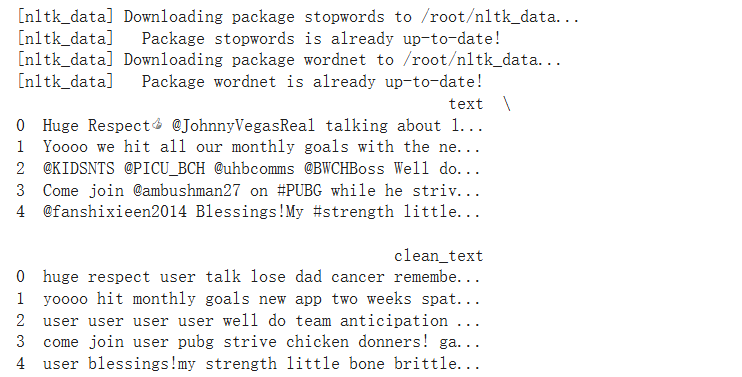

* then it's the embedding part (i've tried roberta and bert on google), here i just present one of them.<br>
* here i just tried to use pre-trained language model found here:https://huggingface.co/cardiffnlp/twitter-roberta-base
* the main idea is embed the text and emotion together, trying to get the contextual meaning of them

In [ ]:
import torch
import numpy as np
import pandas as pd
from transformers import AutoTokenizer, AutoModel
from tqdm import tqdm
import gc
from sklearn.preprocessing import LabelEncoder

# Set parameters
MODEL_NAME = "cardiffnlp/twitter-roberta-base"
MAX_LEN = 70
BATCH_SIZE = 3500
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load Tokenizer and Model
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, use_fast=True)
model = AutoModel.from_pretrained(MODEL_NAME).to(DEVICE).eval()

# Initialize label encoder
label_encoder = LabelEncoder()
train_data['emotion_encoded'] = label_encoder.fit_transform(train_data['emotion'])

# Text embedding function
def generate_embeddings(data, text_column, context_column=None):

    embeddings = np.zeros((len(data), model.config.hidden_size), dtype=np.float32)  # Pre-allocate space
    for start_idx in tqdm(range(0, len(data), BATCH_SIZE), desc="Generating embeddings", unit="batch"):
        end_idx = start_idx + BATCH_SIZE
        if context_column:
            # Combine main text with context text
            combined_texts = (
                data[text_column].iloc[start_idx:end_idx] + " [SEP] " + data[context_column].iloc[start_idx:end_idx]
            ).tolist()
        else:
            combined_texts = data[text_column].iloc[start_idx:end_idx].tolist()

        # Tokenize text
        encodings = tokenizer(
            combined_texts,
            padding=True,
            truncation=True,
            max_length=MAX_LEN,
            return_tensors="pt"
        ).to(DEVICE)

        # Model inference
        with torch.no_grad():
            outputs = model(**encodings)
            batch_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()  # Use [CLS] token embeddings

        # Store embeddings in pre-allocated matrix
        embeddings[start_idx:end_idx] = batch_embeddings

        # Clear memory
        del encodings, outputs, batch_embeddings
        torch.cuda.empty_cache()
        gc.collect()

    return embeddings

# Generate combined embeddings for train_data (text + emotion)
print("Generating embeddings for train_data (text + emotion)...")
train_embeddings = generate_embeddings(train_data, text_column='text', context_column='emotion')
train_data['combined_embeddings'] = list(train_embeddings)

# Generate embeddings for test_data (text only)
print("Generating embeddings for test_data (text only)...")
test_embeddings = generate_embeddings(test_data, text_column='text')
test_data['text_embeddings'] = list(test_embeddings)

# Compute average embeddings for each emotion (reference vectors)
emotion_labels = train_data['emotion'].unique()
emotion_to_vector = {}

for emotion in emotion_labels:
    emotion_vectors = np.array(train_data.loc[train_data['emotion'] == emotion, 'combined_embeddings'].tolist())
    mean_vector = emotion_vectors.mean(axis=0)  # Compute the mean embedding
    emotion_to_vector[emotion] = mean_vector


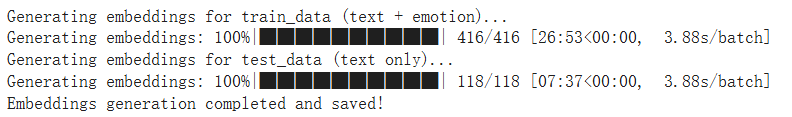

* then i construct the model below, to classify emotions based on pre-computed embeddings

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from nlpaug.augmenter.word import SynonymAug
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure GPU is available
if not tf.config.list_physical_devices('GPU'):
    print("Warning: No GPU found. Running on CPU.")

# Load the data
X_train = np.array(train_data['combined_embeddings'].tolist())
y_train = train_data['emotion']

# Label encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Convert emotion labels into integer values

# Augment minority class data
augmenter = SynonymAug(aug_src='wordnet')


def augment_data(X, y, target_class, num_augmentations):
    """Perform data augmentation for the target class."""
    target_indices = np.where(y == target_class)[0]
    augmented_embeddings = []
    augmented_labels = []
    for idx in target_indices:
        for _ in range(num_augmentations):
            augmented_embeddings.append(X[idx])  # Directly copy the embedding vector
            augmented_labels.append(target_class)
    return np.vstack(augmented_embeddings), np.array(augmented_labels)


# Augment minority classes (e.g., anger, disgust)
classes_to_augment = [label_encoder.transform(['anger'])[0], label_encoder.transform(['disgust'])[0]]
for cls in classes_to_augment:
    augmented_X, augmented_y = augment_data(X_train, y_train_encoded, cls, num_augmentations=3)
    X_train = np.vstack((X_train, augmented_X))
    y_train_encoded = np.hstack((y_train_encoded, augmented_y))

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_encoded),
    y=y_train_encoded
)
class_weights = dict(enumerate(class_weights))
print("\nClass Weights:", class_weights)

# Split the dataset
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train_encoded, test_size=0.2, random_state=42
)

# Build an optimized neural network model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Set callback functions
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-5, verbose=1)

# Train the model
history = model.fit(
    X_train_split, y_train_split,
    validation_data=(X_val, y_val),
    epochs=6,  # Increase the number of training epochs
    batch_size=128,
    class_weight=class_weights,  # Include class weights
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate model performance
y_val_pred_probs = model.predict(X_val)
y_val_pred_encoded = np.argmax(y_val_pred_probs, axis=1)

print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred_encoded, target_names=label_encoder.classes_))
#the subsequent outcome(using the model to predict emotion) is not so good as i submitted to kaggle, so i dont put it here.

### Thought and some reflection：<br>
1. I think i didn't fine-tune the model to get a better embedding result even it's orginally pre-trained on tweeter content. Besides, embedding takes lots of time in my environment, so i need to store it to make the progress smoother without embedding again when used next time.<br>
2. I encounter problems like too focus on cleaning the text at the start, expecting to clean it to the best, but the result isn't good, sometimes in embedding(guessing), machine still need certain words to understand the content, but if i clean it as stopword(for example), then even using a better embeddign model, it might not capture the meaning of the sentence.<br>
3. why LTSM performs better in my case?<br>
I think it's more efficient for me, the dataset may be large enough to allow the model to learn task-specific patterns effectively but Roberta wasn't fine tuend and get restricted to this task,i guess there might be sequential dependencies that are not fully captured by pre-trained embeddings so that we have such result.<br>
4. while trying to classify emotion using the embedding from roberta, i use a DNN Classifier instead of other classifier we've learned in the class, so i still can't say that such embedding is not good at all, i have no compariing basis right here, but i believe that the devil lies in the embedding and preprocessing part.<br>
I really learned a lot in this Lab,found so much thing that can be improved with all that experience.